## HOMEWORK 12

In [37]:
import os
import cv2
import numpy as np
from time import time
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

plt.rcParams['figure.figsize'] = [15, 6]

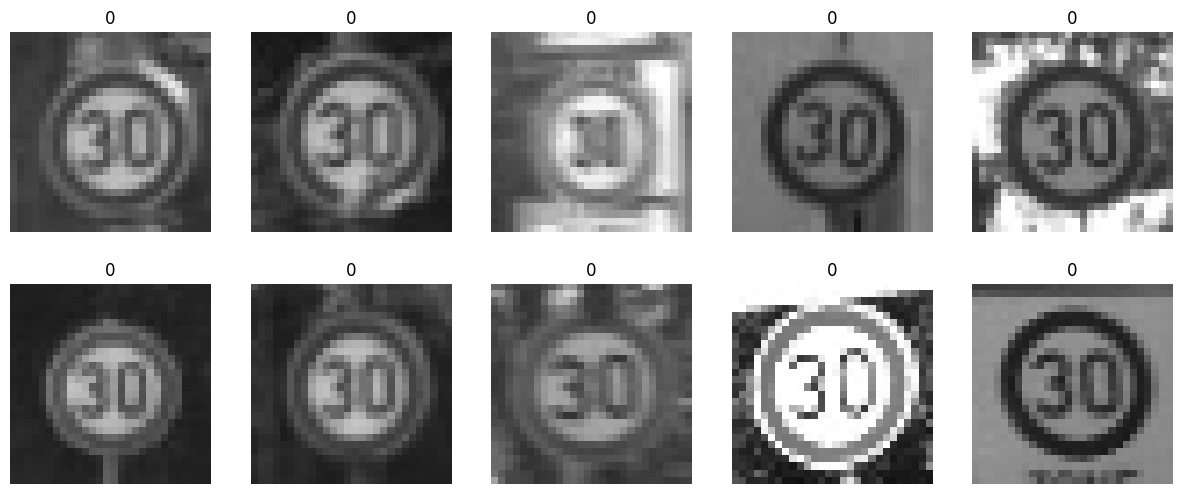

In [38]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

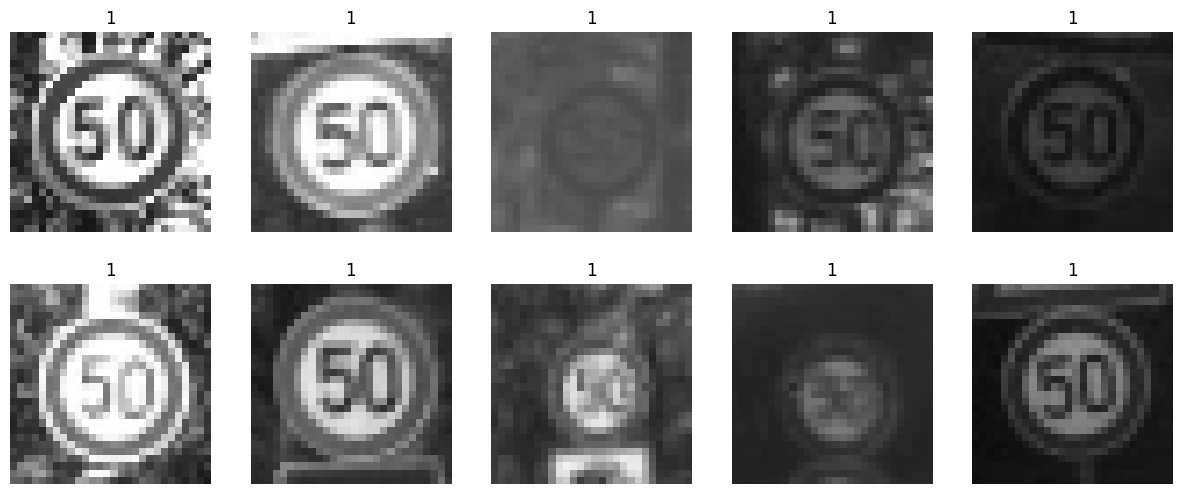

In [39]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [40]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [41]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [42]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 1.0444509983062744


In [43]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.023281335830688477


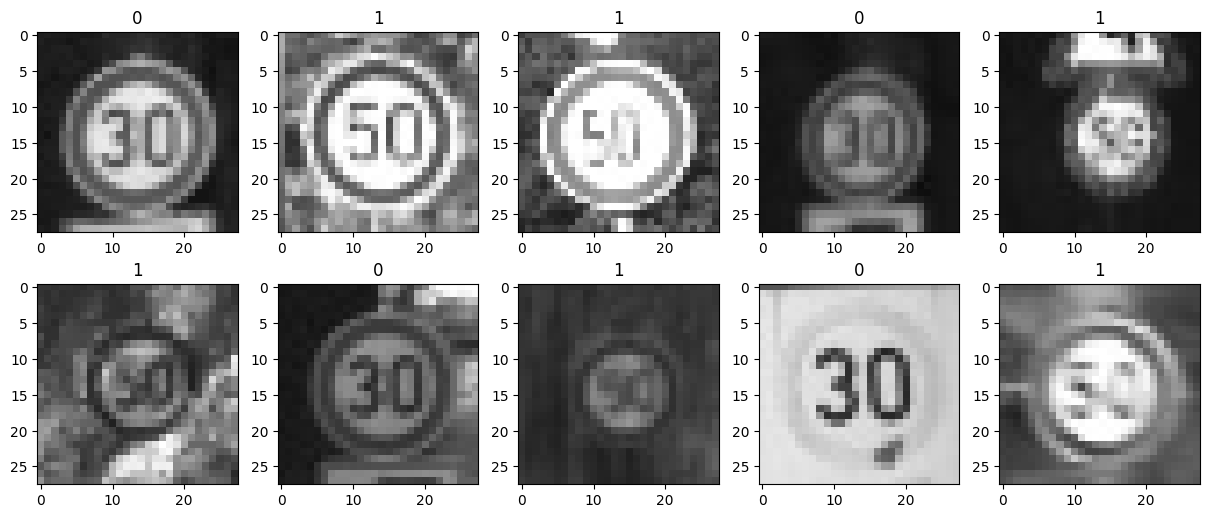

In [44]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [45]:
inputs = Input(shape=(pixels.shape[1],))

outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [47]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')


In [48]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4348
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.2522
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.2145
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.1784
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.1613
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.1389
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.1243
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.1125
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.1156
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.1049


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

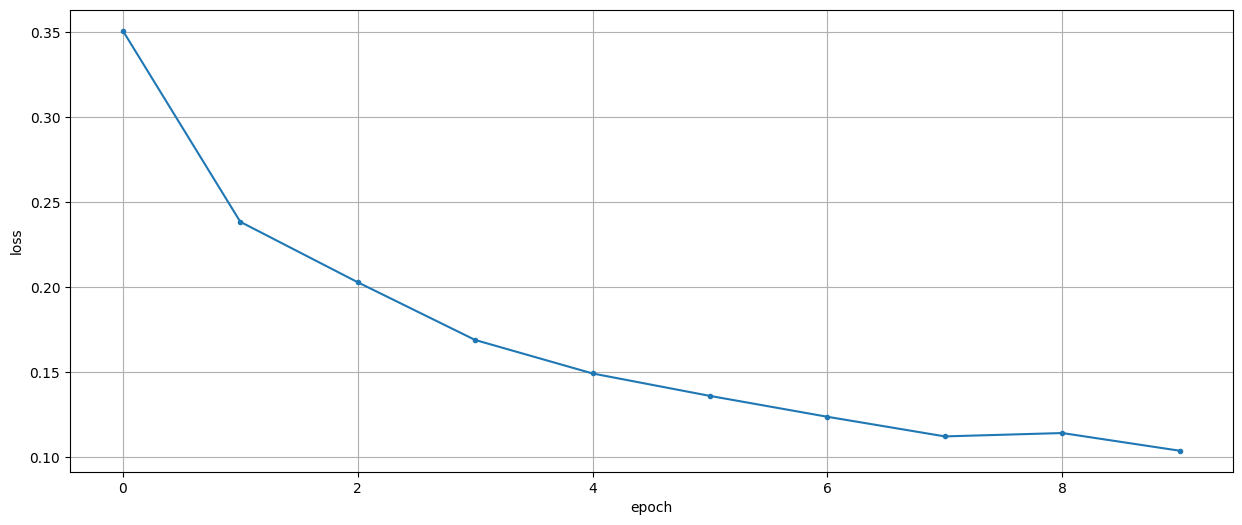

In [49]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.39526588] [0.39526588]


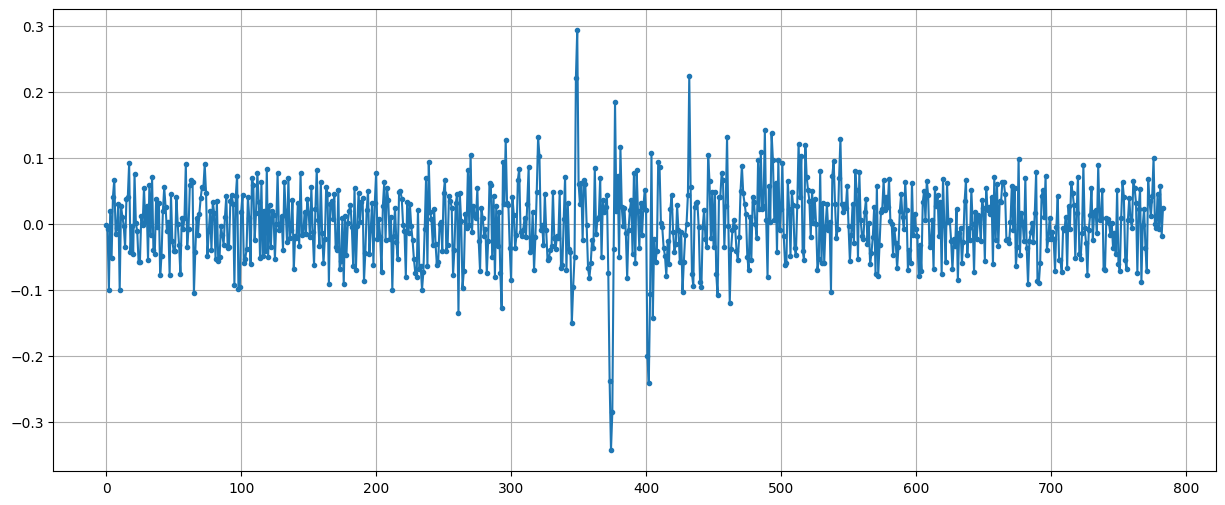

In [50]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [51]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.28591922]] 0


In [52]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


In [53]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9111856823266219


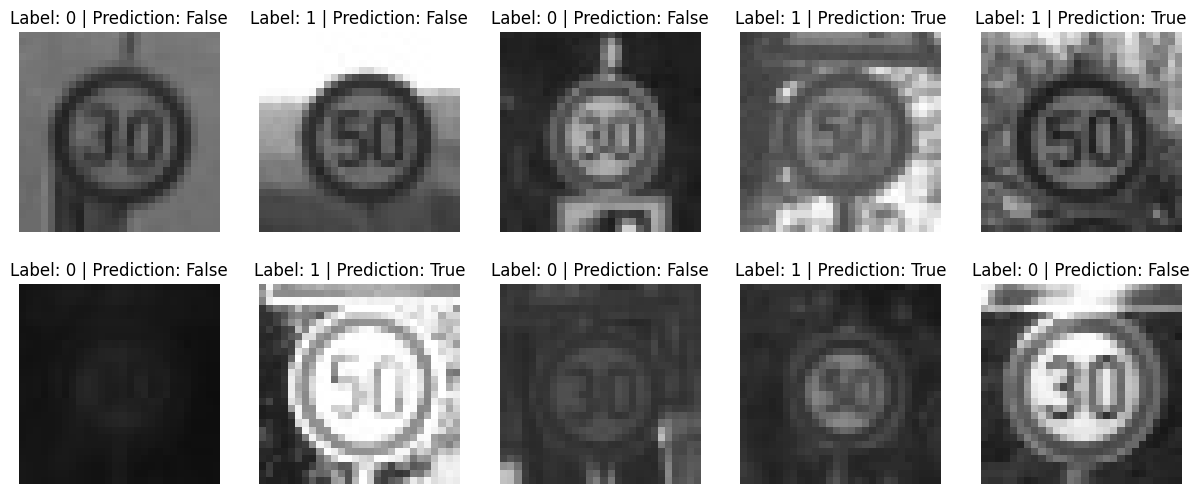

In [54]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)